<a href="https://colab.research.google.com/github/pdthang26/Artificial-Intellignece-ST7-1234/blob/main/Banknotes_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# import matplotlib.pyplot as plt
# from matplotlib.image import imread
# folder = '/content/drive/MyDrive/AI/Banknotes/'
# for i in range(50):
#   plt.subplot(10,6,i+1)
#   filename0 = folder + '5k ('+str(i+1)+').jpg'
#   img = imread(filename0)
#   plt.imshow(img)
# plt.show()
# for i in range(50):
#   plt.subplot(10,6,i+1)
#   filename1 = folder + '10k ('+str(i+1)+').jpg'
#   img = imread(filename1)
#   plt.imshow(img)
# plt.show()
# for i in range(50):
#   plt.subplot(10,6,i+1)
#   filename2 = folder + '20k ('+str(i+1)+').jpg'
#   img = imread(filename2)
#   plt.imshow(img)
# plt.show()
# for i in range(50):
#   plt.subplot(10,6,i+1)
#   filename3 = folder + '50k ('+str(i+1)+').jpg'
#   img = imread(filename3)
#   plt.imshow(img)
# plt.show()
# for i in range(50):
#   plt.subplot(10,6,i+1)
#   filename4 = folder + '100k ('+str(i+1)+').jpg'
#   img = imread(filename4)
#   plt.imshow(img)
# plt.show()
# for i in range(50):
#   plt.subplot(10,6,i+1)
#   filename5 = folder + '500k ('+str(i+1)+').jpg'
#   img = imread(filename5)
#   plt.imshow(img)
# plt.show()



In [78]:
# from os import listdir
# from numpy import asarray
# from numpy import save
# from keras.utils import load_img, img_to_array
# folder1 = '/content/drive/MyDrive/AI/Banknotes_train/'
# photos1, labels1 = list(),list()
# for file in listdir(folder1):
#   output = 0.0
#   if file.startswith('5k '):
#     output = 0
#   if file.startswith('10k '):
#     output = 1
#   if file.startswith('20k '):
#     output = 2
#   if file.startswith('50k '):
#     output = 3
#   if file.startswith('100k '):
#     output = 4
#   if file.startswith('500k '):
#     output = 5
#   img = load_img(folder1 + file, target_size= (40,30))
#   photo = img_to_array(img)
#   photos1.append(photo)
#   labels1.append(output)
# photos1=asarray(photos1)
# labels1=asarray(labels1)
# print(photos1.shape, labels1.shape)
# save('/content/drive/MyDrive/AI/banknotes_photo_train.npy',photos1)
# save('/content/drive/MyDrive/AI/banknotes_labels_train.npy',labels1)

# folder = '/content/drive/MyDrive/AI/Banknotes_test/'
# photos, labels = list(),list()
# for file in listdir(folder):
#   output = 0.0
#   if file.startswith('5k '):
#     output = 0
#   if file.startswith('10k '):
#     output = 1
#   if file.startswith('20k '):
#     output = 2
#   if file.startswith('50k '):
#     output = 3
#   if file.startswith('100k '):
#     output = 4
#   if file.startswith('500k '):
#     output = 5
#   img = load_img(folder + file, target_size= (40,30))
#   photo = img_to_array(img)
#   photos.append(photo)
#   labels.append(output)
# photos=asarray(photos)
# labels=asarray(labels)
# print(photos.shape, labels.shape)
# save('/content/drive/MyDrive/AI/banknotes_photo_test.npy',photos)
# save('/content/drive/MyDrive/AI/banknotes_labels_test.npy',labels)

In [79]:
import numpy as np
features = np.load('/content/drive/MyDrive/AI/banknotes_photo_train.npy')
target = np.load('/content/drive/MyDrive/AI/banknotes_labels_train.npy')
# x_train = np.load('/content/drive/MyDrive/AI/banknotes_photo_train.npy')
# y_train = np.load('/content/drive/MyDrive/AI/banknotes_labels_train.npy')
# x_test = np.load('/content/drive/MyDrive/AI/banknotes_photo_test.npy')
# y_test = np.load('/content/drive/MyDrive/AI/banknotes_labels_test.npy')

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state =1)

In [81]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(306, 100, 300, 3)
(306,)
(205, 100, 300, 3)
(205,)


In [82]:

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,6)
y_test = to_categorical(y_test,6)

In [83]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
kernel = (3,3)

model = Sequential()
#32 lan tich chap
model.add(Conv2D(64,kernel_size=kernel,activation='linear',input_shape=(100,300,3),padding='Same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(128,kernel_size=kernel,activation='linear',padding='Same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(256,kernel_size=kernel,activation='linear',padding='Same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#256 lan tich chap
model.add(Conv2D(512,kernel_size=kernel,activation='linear',padding='Same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(512,kernel_size=kernel,activation='linear',padding='Same'))


model.add(Flatten())
model.add(Dense(1080,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(6,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=20,epochs = 50,verbose = 1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print("loss;" , test_loss)
print("Accuracy:", test_acc)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 100, 300, 64)      1792      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 100, 300, 64)      0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 50, 150, 64)      0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 50, 150, 64)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 50, 150, 128)      73856     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 50, 150, 128)      0         
                                                      

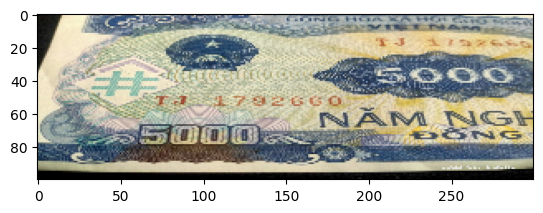

1/1 [==============================] - 0s 182ms/step
5 000 VND
[0]


In [84]:
from keras.models import load_model

import matplotlib.pyplot as plt

from keras.utils.image_utils import img_to_array, load_img

banknotes = {0:'5 000 VND',1:'10 000 VND',2: '20 000 VND',3:'50 000 VND',4: '100 000 VND', 5:'500 000 VND'}
url='/content/drive/MyDrive/AI/test backnote/5k.jpg'
img = load_img(url, target_size= (100,300))
plt. imshow(img, cmap = plt.cm.binary)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,300,3)
img = img.astype('float32')/255

import numpy as np
ketqua=np.argmax(model.predict(img), axis = 1)
print(banknotes[ketqua[0]])
print(ketqua)


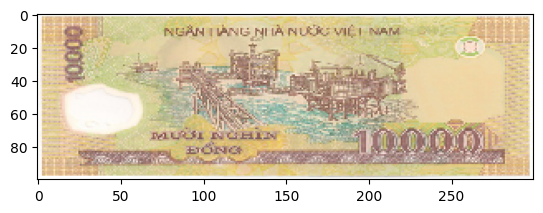

1/1 [==============================] - 0s 65ms/step
10 000 VND
[1]


In [85]:

url='/content/drive/MyDrive/AI/test backnote/10k.jpg'
img = load_img(url, target_size= (100,300))
plt. imshow(img, cmap = plt.cm.binary)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,300,3)
img = img.astype('float32')/255

import numpy as np
ketqua=np.argmax(model.predict(img), axis = 1)
print(banknotes[ketqua[0]])
print(ketqua)


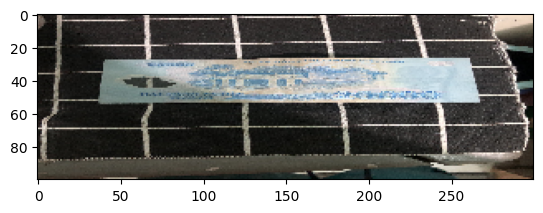

1/1 [==============================] - 0s 34ms/step
20 000 VND
[2]


In [86]:
url='/content/drive/MyDrive/AI/test backnote/20k.jpg'

img = load_img(url, target_size= (100,300))
plt. imshow(img, cmap = plt.cm.binary)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,300,3)
img = img.astype('float32')/255

import numpy as np
ketqua=np.argmax(model.predict(img), axis = 1)
print(banknotes[ketqua[0]])
print(ketqua)

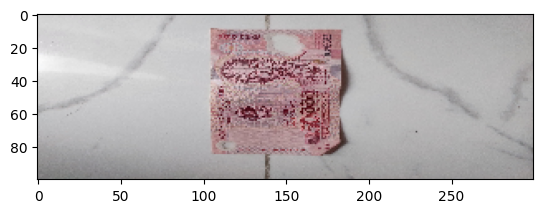

1/1 [==============================] - 0s 34ms/step
50 000 VND
[3]


In [87]:
url='/content/drive/MyDrive/AI/test backnote/50k.jpg'
img = load_img(url, target_size= (100,300))
plt. imshow(img, cmap = plt.cm.binary)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,300,3)
img = img.astype('float32')/255

import numpy as np
ketqua=np.argmax(model.predict(img), axis = 1)
print(banknotes[ketqua[0]])
print(ketqua)

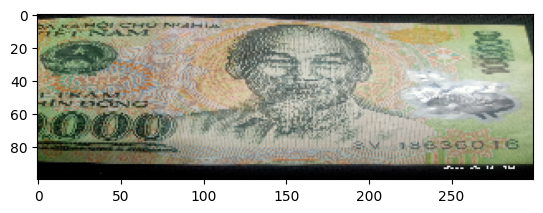

1/1 [==============================] - 0s 27ms/step
100 000 VND
[4]


In [88]:
url='/content/drive/MyDrive/AI/test backnote/100k1.jpg'
img = load_img(url, target_size= (100,300))
plt. imshow(img, cmap = plt.cm.binary)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,300,3)
img = img.astype('float32')/255

import numpy as np
ketqua=np.argmax(model.predict(img), axis = 1)
print(banknotes[ketqua[0]])
print(ketqua)

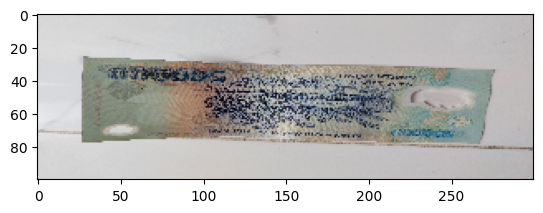

1/1 [==============================] - 0s 33ms/step
500 000 VND
[5]


In [94]:
url='/content/drive/MyDrive/AI/test backnote/500k.jpg'
img = load_img(url, target_size= (100,300))
plt. imshow(img, cmap = plt.cm.binary)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,300,3)
img = img.astype('float32')/255

import numpy as np
ketqua=np.argmax(model.predict(img), axis = 1)
print(banknotes[ketqua[0]])
print(ketqua)

In [95]:

model.save("/content/drive/MyDrive/AI/banknotes_model.h5")

